In [ ]:
Chatgpt Link : https://chatgpt.com/share/67b6ffb7-80e8-8007-a6d4-119d4e67b38d

In [ ]:
Q1.Multi-Scale Morphological Segmentation for Satellite Image Enhancement
    • Implement multi-scale morphological filtering for terrain segmentation.
        ◦  Apply small SE for fine details (e.g., roads, buildings).
        ◦ Apply large SE for coarse structures (e.g., forests, rivers).
        ◦ Merge results using weighted fusion.
    • Use adaptive structuring elements to process different landscapes.
    •  Urban Areas → Use rectangular SEs (aligned with buildings).
    •  Forests & Vegetation → Use circular SEs (preserve tree clusters).
    •  Mountains & Hills → Use elliptical SEs (capture sloped terrains).
    • Water Bodies → Use disk-shaped SEs (eliminate boundary noise).

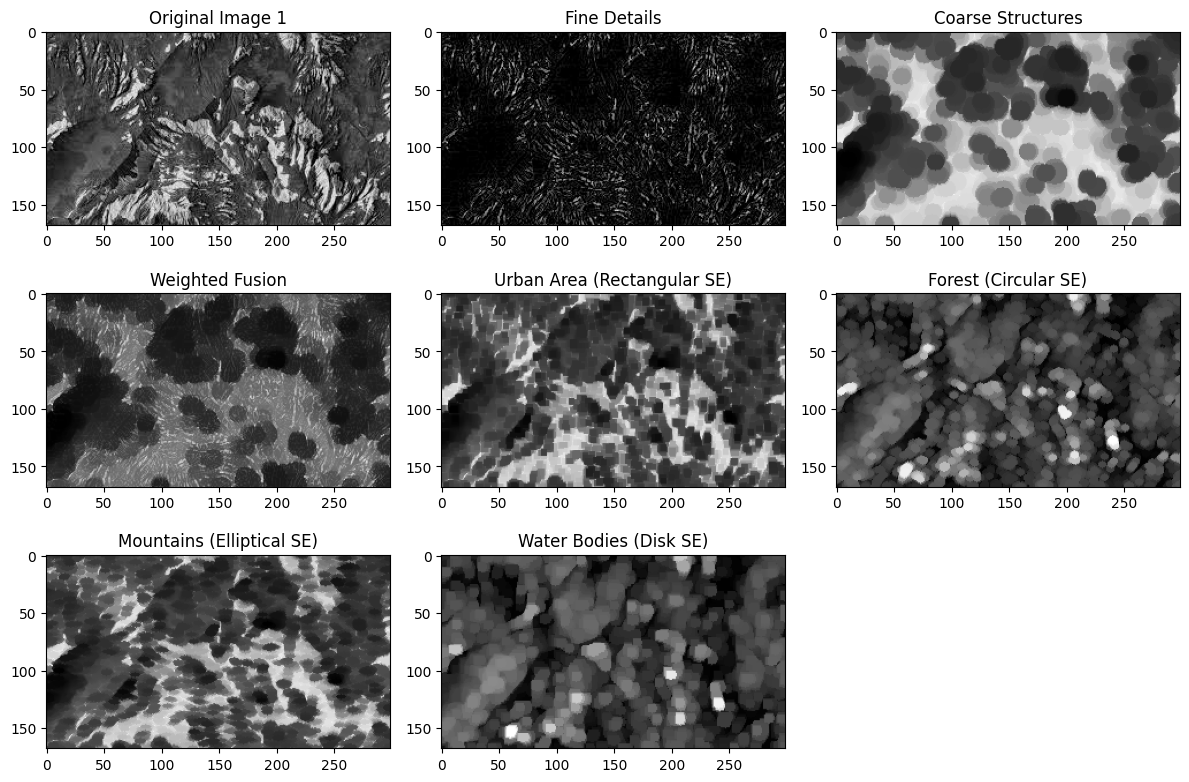

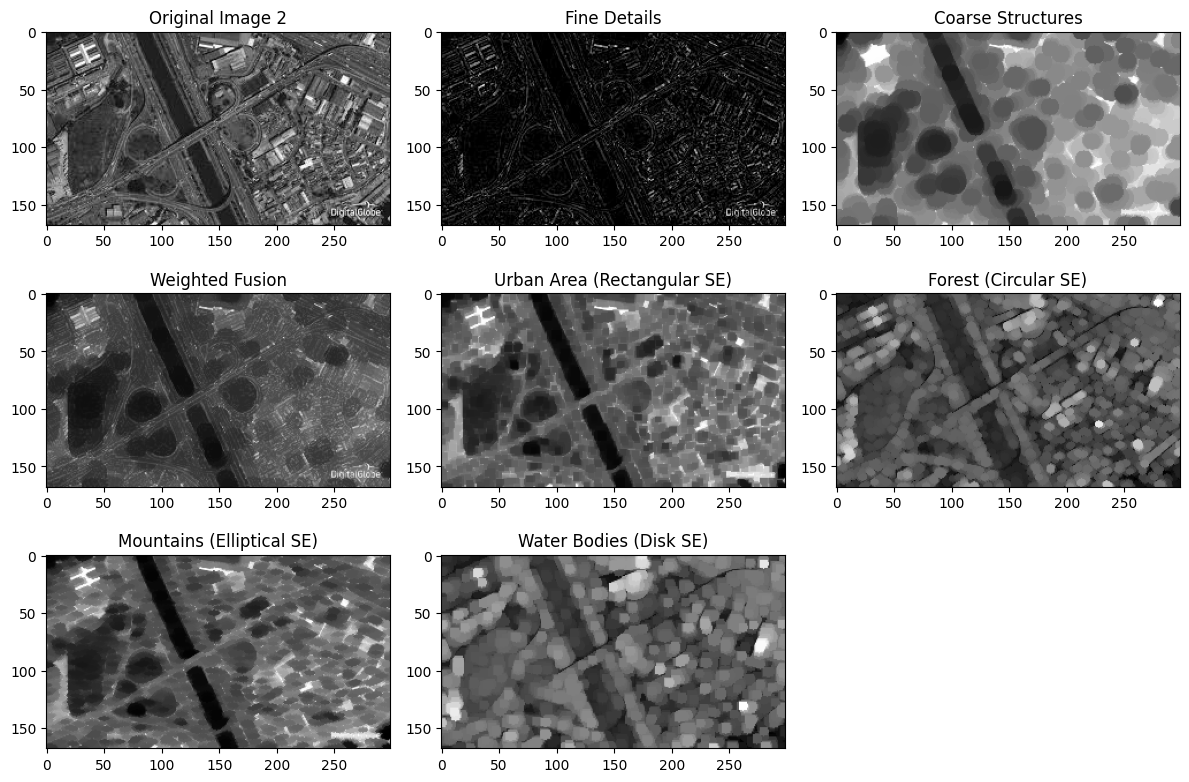

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load satellite images
image1 = cv2.imread("/home/student/Downloads/satellite.jpeg")
image2 = cv2.imread("1")

# Convert images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Define structuring elements for different landscapes
se_small = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))   # Fine details
se_large = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))  # Coarse structures

se_urban = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))  # Buildings
se_forest = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))  # Tree clusters
se_mountain = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 5))  # Sloped terrains
se_water = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (8, 8))  # Water boundaries

# Apply morphological operations
def apply_morphological_processing(image, se_small, se_large):
    fine_details = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, se_small)
    coarse_structures = cv2.morphologyEx(image, cv2.MORPH_CLOSE, se_large)
    weighted_fusion = cv2.addWeighted(fine_details, 0.5, coarse_structures, 0.5, 0)
    return fine_details, coarse_structures, weighted_fusion

# Process images
fine1, coarse1, fusion1 = apply_morphological_processing(gray1, se_small, se_large)
fine2, coarse2, fusion2 = apply_morphological_processing(gray2, se_small, se_large)

# Apply adaptive structuring elements
urban1 = cv2.morphologyEx(gray1, cv2.MORPH_CLOSE, se_urban)
forest1 = cv2.morphologyEx(gray1, cv2.MORPH_OPEN, se_forest)
mountain1 = cv2.morphologyEx(gray1, cv2.MORPH_CLOSE, se_mountain)
water1 = cv2.morphologyEx(gray1, cv2.MORPH_OPEN, se_water)

urban2 = cv2.morphologyEx(gray2, cv2.MORPH_CLOSE, se_urban)
forest2 = cv2.morphologyEx(gray2, cv2.MORPH_OPEN, se_forest)
mountain2 = cv2.morphologyEx(gray2, cv2.MORPH_CLOSE, se_mountain)
water2 = cv2.morphologyEx(gray2, cv2.MORPH_OPEN, se_water)

# Display results
def show_images(original, fine, coarse, fusion, urban, forest, mountain, water, title):
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, 1), plt.imshow(original, cmap='gray'), plt.title(title)
    plt.subplot(3, 3, 2), plt.imshow(fine, cmap='gray'), plt.title("Fine Details")
    plt.subplot(3, 3, 3), plt.imshow(coarse, cmap='gray'), plt.title("Coarse Structures")
    plt.subplot(3, 3, 4), plt.imshow(fusion, cmap='gray'), plt.title("Weighted Fusion")
    plt.subplot(3, 3, 5), plt.imshow(urban, cmap='gray'), plt.title("Urban Area (Rectangular SE)")
    plt.subplot(3, 3, 6), plt.imshow(forest, cmap='gray'), plt.title("Forest (Circular SE)")
    plt.subplot(3, 3, 7), plt.imshow(mountain, cmap='gray'), plt.title("Mountains (Elliptical SE)")
    plt.subplot(3, 3, 8), plt.imshow(water, cmap='gray'), plt.title("Water Bodies (Disk SE)")
    plt.tight_layout()
    plt.show()

# Show results for Image 1
show_images(gray1, fine1, coarse1, fusion1, urban1, forest1, mountain1, water1, "Original Image 1")

# Show results for Image 2
show_images(gray2, fine2, coarse2, fusion2, urban2, forest2, mountain2, water2, "Original Image 2")


In [ ]:
Q2. Dynamic Graph-Based Image Segmentation with Adaptive Edge Weights
    • Implement a graph-based segmentation algorithm that dynamically updates edge weights based on local contrast.
    • Use a self-learning mechanism to refine segment boundaries iteratively

In [10]:
pip install -U scikit-image

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 9.1 MB/s eta 0:00:000m eta 0:00:010:01:01
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.25.0
    Uninstalling scikit-image-0.25.0:
      Successfully uninstalled scikit-image-0.25.0
Note: you may need to restart the kernel to use updated packages.


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/tmp/ipykernel_15044/1115113509.py:26: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  labels = segmentation.slic(image, compactness=30, n_segments=400)


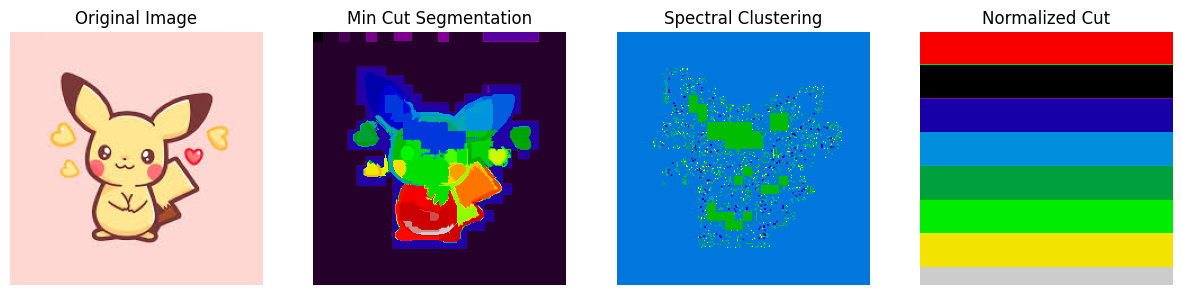

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import segmentation, color
from sklearn.cluster import SpectralClustering
import networkx as nx

def min_cut_segmentation(image):
    """Perform segmentation using Minimum Cut (Felzenszwalb method)."""
    segments = segmentation.felzenszwalb(image, scale=100, sigma=0.5, min_size=50)
    return segments

def spectral_segmentation(image, n_clusters=5):
    """Perform segmentation using Spectral Clustering."""
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    reshaped_img = gray.reshape(-1, 1)
    
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
    labels = spectral.fit_predict(reshaped_img)
    segmented_img = labels.reshape(gray.shape)
    
    return segmented_img

def normalized_cut_segmentation(image):
    """Perform segmentation using Normalized Cut with NetworkX."""
    labels = segmentation.slic(image, compactness=30, n_segments=400)
    g = nx.Graph()
    for i in range(labels.shape[0]):
        for j in range(labels.shape[1]):
            g.add_node((i, j), intensity=image[i, j].sum())
            if i > 0:
                g.add_edge((i, j), (i-1, j))
            if j > 0:
                g.add_edge((i, j), (i, j-1))
    partition = nx.community.greedy_modularity_communities(g)
    ncut_labels = np.zeros_like(labels)
    for idx, community in enumerate(partition):
        for pixel in community:
            ncut_labels[pixel] = idx
    return ncut_labels

def plot_results(original, min_cut, spectral, ncut):
    """Display segmentation results for different methods."""
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")
    
    plt.subplot(1, 4, 2)
    plt.imshow(min_cut, cmap='nipy_spectral')
    plt.title("Min Cut Segmentation")
    plt.axis("off")
    
    plt.subplot(1, 4, 3)
    plt.imshow(spectral, cmap='nipy_spectral')
    plt.title("Spectral Clustering")
    plt.axis("off")
    
    plt.subplot(1, 4, 4)
    plt.imshow(ncut, cmap='nipy_spectral')
    plt.title("Normalized Cut")
    plt.axis("off")
    
    plt.show()

# Load a sample image (replace 'image.jpg' with actual path)
image = cv2.imread('/home/student/Downloads/pichu.jpeg')
if image is None:
    raise ValueError("Image not found. Replace 'image.jpg' with actual path.")

# Perform segmentations
min_cut_result = min_cut_segmentation(image)
spectral_result = spectral_segmentation(image)
ncut_result = normalized_cut_segmentation(image)

# Display results
plot_results(image, min_cut_result, spectral_result, ncut_result)


In [ ]:
Q3. Morphological Hit-or-Miss Transform for Document Forgery Detection
    • Implement hit-or-miss transform to detect forgery marks in scanned documents.
    • Design custom structuring elements for common fraud patterns.

/tmp/ipykernel_13914/3649487639.py:14: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -1 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  struct1 = np.array([[0, 1, 0],
/tmp/ipykernel_13914/3649487639.py:19: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -1 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  struct2 = np.array([[1, 1, 1],
/tmp/ipykernel_13914/3649487639.py:24: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -1 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (t

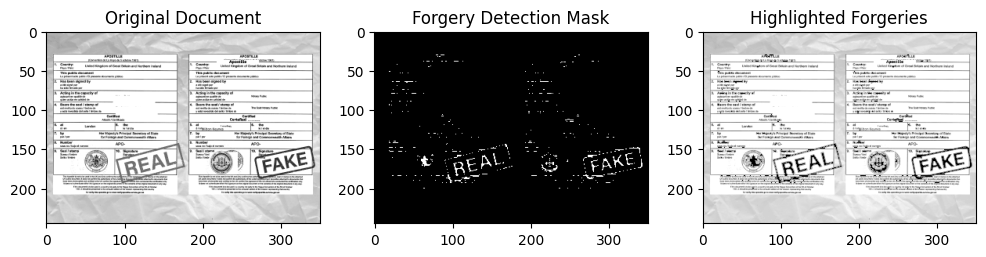

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# **Load the scanned document image**
image_path = "/home/student/Downloads/doc1.png"  # Change to your file path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# **Preprocessing**
_, binary = cv2.threshold(image, 180, 255, cv2.THRESH_BINARY_INV)  # Inverted for hit-or-miss

# **Define Structuring Elements for Common Forgery Marks**
# - **Small dots / erasures**
struct1 = np.array([[0, 1, 0], 
                    [1, -1, 1], 
                    [0, 1, 0]], dtype=np.uint8)

# - **Straight lines (for text modification)**
struct2 = np.array([[1, 1, 1], 
                    [-1, -1, -1], 
                    [1, 1, 1]], dtype=np.uint8)

# - **Forgery patches / stamp modifications**
struct3 = np.array([[1, -1, 1], 
                    [-1, 1, -1], 
                    [1, -1, 1]], dtype=np.uint8)

# **Apply Hit-or-Miss Transform**
def hit_or_miss(binary_img, struct_elem):
    return cv2.morphologyEx(binary_img, cv2.MORPH_HITMISS, struct_elem)

result1 = hit_or_miss(binary, struct1)
result2 = hit_or_miss(binary, struct2)
result3 = hit_or_miss(binary, struct3)

# **Combine detections**
final_result = cv2.bitwise_or(cv2.bitwise_or(result1, result2), result3)

# **Overlay detected forgeries on original image**
forgery_highlighted = image.copy()
forgery_highlighted[final_result > 0] = 0  # Make forgeries black

# **Display Results**
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(image, cmap="gray"), plt.title("Original Document")
plt.subplot(1, 3, 2), plt.imshow(final_result, cmap="gray"), plt.title("Forgery Detection Mask")
plt.subplot(1, 3, 3), plt.imshow(forgery_highlighted, cmap="gray"), plt.title("Highlighted Forgeries")
plt.show()
